# Let's make a 2-layer neural network using just NumPy!

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import os

### Simple binary classification dataset

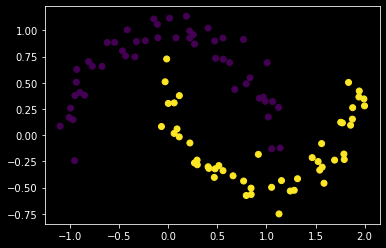

In [40]:
X, Y = make_moons(noise=0.1)
Y = np.expand_dims(Y, 1)
plt.style.use('dark_background')
plt.scatter(X.T[0], X.T[1], c=Y)
plt.show()

### Activation functions

In [41]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    D = np.copy(Z)
    D[D < 0] = 0
    D[D > 0] = 1

    return D

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

### Loss function

In [42]:
def lse(Y, Y_hat):
    return ((Y - Y_hat) ** 2) / 2

def lse_derivative(Y, Y_hat):
    return Y_hat - Y

### Initialize model parameters

In [43]:
def init_parameters(in_channels, hidden_channels, out_channels):
    W1 = np.random.randn(in_channels, hidden_channels)
    b1 = np.random.randn(hidden_channels)

    W2 = np.random.randn(hidden_channels, out_channels)
    b2 = np.random.randn(out_channels)

    parameters = [W1, b1, W2, b2]

    return parameters

### Forward pass

In [44]:
def forward(X, parameters, training=False):
    W1, b1, W2, b2 = parameters

    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    if training:
        cache = [Z1, A1, Z2, A2]

        return A2, cache
    else:
        return A2

### Backprop

In [45]:
def backward(X, Y, parameters, cache):
    _, _, W2, _ = parameters
    Z1, A1, Z2, A2 = cache

    dA2 = lse_derivative(Y, A2)
    dZ2 = dA2 * sigmoid_derivative(Z2)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)

    N = Y.shape[0]

    dW2 = (A1.T @ dZ2) / N
    db2 = np.sum(dZ2, axis=0) / N

    dW1 = (X.T @ dZ1) / N
    db1 = np.sum(dZ1, axis=0) / N

    gradients = [dW1, db1, dW2, db2]

    return gradients

### Point classification accuracy

In [46]:
def acc(Y, Y_hat):
    pred = np.copy(Y_hat)
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1

    return np.sum(Y == pred) / Y.shape[0]

### Plot decision boundary

In [47]:
def plot_boundary(X, Y, parameters, epoch):
    res = 50
    x1, x2 = -1.5, 2.5
    y1, y2 = -1, 1.5
    grid_x, grid_y = np.meshgrid(np.linspace(x1, x2, num=res), np.linspace(y1, y2, num=res))

    grid = np.concatenate((grid_x.reshape((res ** 2, 1)), grid_y.reshape((res ** 2, 1))), axis=1)
    Y_hat = forward(grid, parameters)

    num_contours = 2 * 5 + 1
    plt.contourf(grid_x, grid_y, Y_hat.reshape(res, res), np.linspace(0, 1, num=num_contours), alpha=0.7)
    plt.contour(grid_x, grid_y, Y_hat.reshape(res, res), [0.5])
    plt.scatter(X.T[0], X.T[1], c=Y, edgecolors='black')
    plt.title(f'decision boundary after epoch {epoch + 1:5d}')

    if not os.path.isdir('./boundaries'):
        os.mkdir('./boundaries')
    
    plt.savefig(f'./boundaries/boundary_epoch_{epoch + 1:05d}.png')
    plt.close()

### Plot loss curve

In [48]:
def plot_loss(losses):
    plt.plot(losses)
    plt.title('loss after each epoch')
    
    if not os.path.isdir('./img'):
        os.mkdir('./img')

    plt.savefig(f'./img/loss_curve.png')
    plt.close()

### Training

In [49]:
def train(X, Y, parameters, n_iterations, alpha):
    Y_hat, cache = forward(X, parameters, training=True)
    
    losses = []

    for epoch in range(n_iterations):
        gradients = backward(X, Y, parameters, cache)
        
        for k in range(len(parameters)):
            parameters[k] -= alpha * gradients[k]

        Y_hat, cache = forward(X, parameters, training=True)
        epoch_loss = np.sum(lse(Y, Y_hat))
        accuracy = acc(Y, Y_hat)
        print(f'epoch {epoch + 1:5d}: loss = {epoch_loss:6f}, accuracy = {accuracy:6f}')

        if (epoch + 1) % 100 == 0:
            plot_boundary(X, Y, parameters, epoch)

        losses.append(epoch_loss)

    plot_loss(losses)


In [50]:
parameters = init_parameters(X.shape[1], 4, Y.shape[1])

train(X, Y, parameters, 2000, 0.1)

epoch     1: loss = 16.970904, accuracy = 0.500000
epoch     2: loss = 16.690525, accuracy = 0.500000
epoch     3: loss = 16.402736, accuracy = 0.500000
epoch     4: loss = 16.108495, accuracy = 0.500000
epoch     5: loss = 15.808964, accuracy = 0.500000
epoch     6: loss = 15.505503, accuracy = 0.500000
epoch     7: loss = 15.199659, accuracy = 0.500000
epoch     8: loss = 14.893140, accuracy = 0.500000
epoch     9: loss = 14.587777, accuracy = 0.500000
epoch    10: loss = 14.285478, accuracy = 0.500000
epoch    11: loss = 13.988168, accuracy = 0.500000
epoch    12: loss = 13.697728, accuracy = 0.500000
epoch    13: loss = 13.415934, accuracy = 0.500000
epoch    14: loss = 13.144389, accuracy = 0.500000
epoch    15: loss = 12.884478, accuracy = 0.500000
epoch    16: loss = 12.637385, accuracy = 0.500000
epoch    17: loss = 12.403867, accuracy = 0.500000
epoch    18: loss = 12.184457, accuracy = 0.500000
epoch    19: loss = 11.979399, accuracy = 0.500000
epoch    20: loss = 11.788666, 

In [51]:
!convert -delay 1 -loop 0 ./boundaries/*.png ./img/decision_boundary.gif